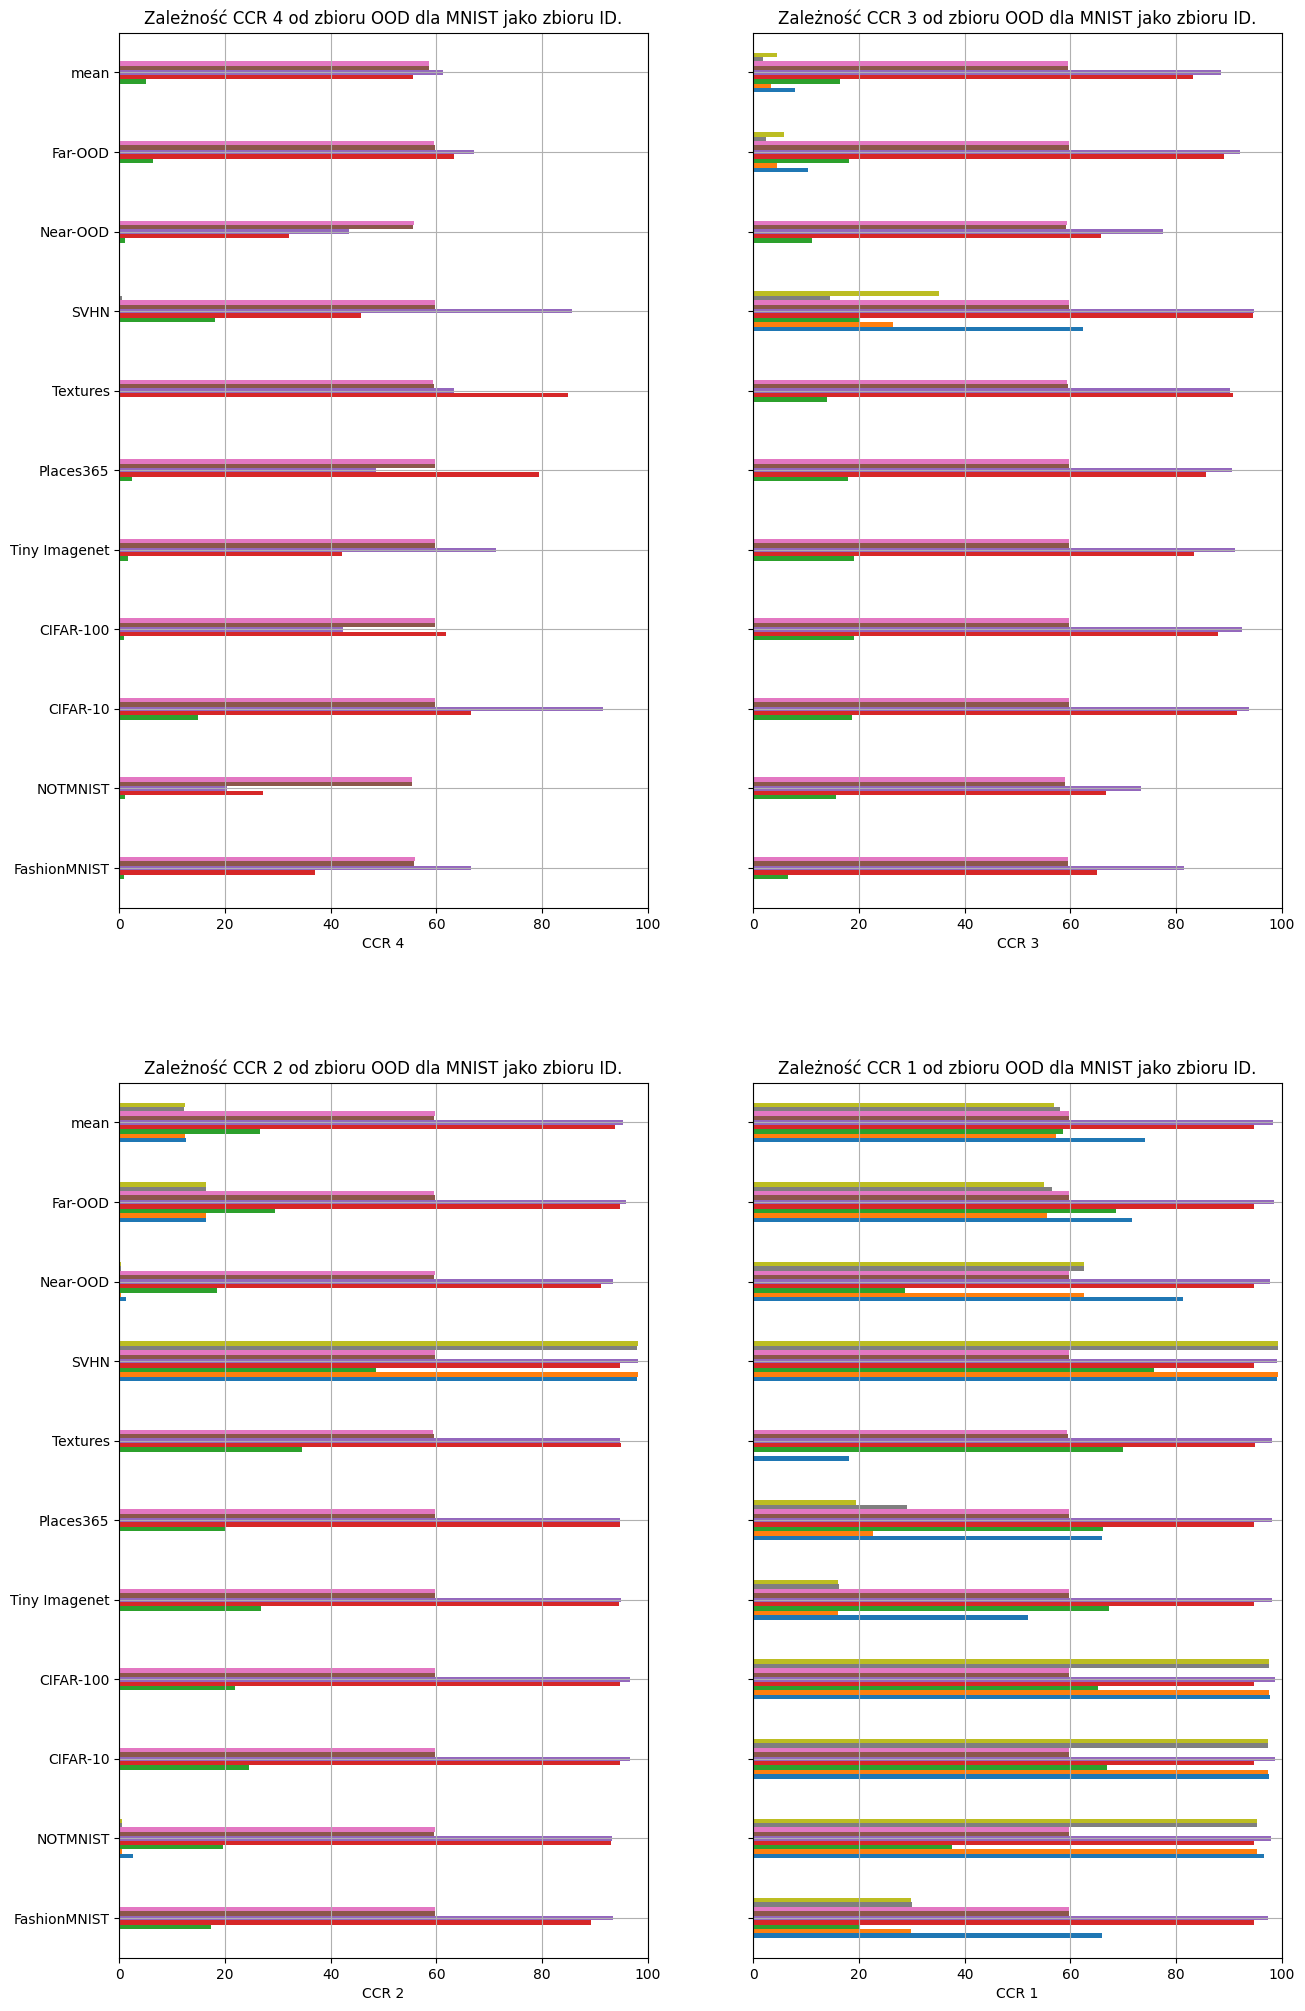

In [27]:
import matplotlib.pyplot as plt
import csv

import numpy as np
import pandas as pd
  
x, y = [], []
labels = ['FPR@95','AUROC','AUPR-IN','AUPR-OUT','CCR 4','CCR 3','CCR 2','CCR 1','ACCURACY','ERROR','DELTA']
methods = ['MSP', 'MLS', 'ReAct', 'KNN', 'LOF', 'MDS', 'MDS w/o ip', 'ODIN', 'ODIN w/o ip']
ood_datasets = ['CIFAR-100', 'Tiny ImageNet', 'Places365', 'Textures', 'SVHN', 'MNIST', 'FashionMNIST', 'NOTMNIST', 'Near-OOD', 'Far-OOD', 'średnia']
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g']

with open('../features/ood__.csv','r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        x.append(row[0])
        y.append([float(z) for z in row[1:]])

y, x = np.array(y), np.array(x)
plots = 4
if plots % 2 == 0:
    fig, ax = plt.subplots(plots//2, plots//2)
else:
    fig, ax = plt.subplots(1, plots)
if plots == 1:
    ax = [ax]
    
# plt.figure(figsize=(30,30))
# y_ = []
offset = 4
x_axis = np.arange(len(ood_datasets))
for j in range(offset, plots + offset):
    mask = (np.arange(y.shape[0]) >=99)
    # mask = (np.arange(y.shape[0]) % 11 == 8)
    x_ = [x for x, m in zip(x, mask) if m]
    x_ = np.array([x_[i:i+11] for i in range(0, len(x_), 11)])
    # y_.append([x for x, m in zip(y[:,j], mask) if m])
    mask = (np.arange(y.shape[0]) >=99)
    y__ = [x for x, m in zip(y[:,j], mask) if m]
    y__ = np.array([y__[i:i+11] for i in range(0, len(y__), 11)])
    # for k in range(9):
    #     # ax[j - offset].bar(x_axis+0.05*(k+1), y__[k], color = colors[k], width = 0.05, label = methods[k])
    #     print(y__[k], x_[0])
    df = pd.DataFrame(np.transpose(y__), columns=methods, index=x_[0])
    if plots % 2 == 0:
        if j-offset == 3:
            df.plot.barh(figsize=(15,25), ax=ax[(j-offset)//2][(j-offset)%2], xlabel=labels[j], sharey=True, grid=True, 
                         xlim=[0,100], title=f'Zależność {labels[j]} od zbioru OOD dla {"CIFAR-10" if mask[0] else "MNIST"} jako zbioru ID.').legend(loc='upper left')
        else:
            df.plot.barh(figsize=(15,25), ax=ax[(j-offset)//2][(j-offset)%2], xlabel=labels[j], sharey=True, grid=True, legend=False, 
                         xlim=[0,100] if j-offset == 0 else [0,100], title=f'Zależność {labels[j]} od zbioru OOD dla {"CIFAR-10" if mask[0] else "MNIST"} jako zbioru ID.')
    else:
        if j-offset == 2:
            df.plot.barh(figsize=(15,12), ax=ax[j-offset], xlabel=labels[j], sharey=True, grid=True, 
                         xlim=[-40,10], title=f'''Zależność {labels[j]} od zbioru 
OOD dla {"CIFAR-10" if mask[0] else "MNIST"} jako zbioru ID.''').legend(loc='center left')
        else:
            df.plot.barh(figsize=(15,12), ax=ax[j-offset], xlabel=labels[j], sharey=True, grid=True, legend=False, 
                         xlim=[0,35] if j-offset == 1 else [50, 100], title=f'''Zależność {labels[j]} od zbioru 
OOD dla {"CIFAR-10" if mask[0] else "MNIST"} jako zbioru ID.''')
        # plt.barh(x_axis+0.1*k, left=y__[k], color = colors[k], width = .1, height=0.1, label = methods[k])
    # ax[j - offset].tick_params(axis='x', labelrotation=90)
    # ax[j - offset].xticks(rotation = 90) 
    # ax[j - offset].set_xlabel('dataset')
    # plt.yticks(x_axis,x_[0])
    # if j == 0:
    #     ax[j - offset].set_ylim([25, 60]) 
    # else:
    #     ax[j - offset].set_ylim([80, 100])         
    # ax[j - offset].set_ylabel(labels[j])
    # plt.title(f'Zależność {labels[j]} od zbioru OOD dla zbioru {"CIFAR-10" if mask[0] else "MNIST"} jako ID.')
    # plt.legend()


(198, 11)


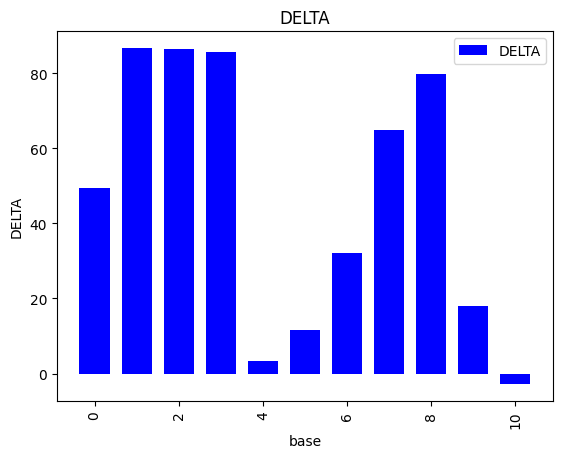

In [23]:
import matplotlib.pyplot as plt
import csv

import numpy as np
  
x = []
y = []
labels = ['FPR@95','AUROC','AUPR_IN','AUPR_OUT','CCR_4','CCR_3','CCR_2','CCR_1','ACCURACY','ERROR','DELTA']
i = 10
with open('../features/ood.csv','r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        x.append(row[0])
        y.append([float(z) for z in row[1:]])

y = np.array(y)
print(y.shape)
means = []
for n in range(11):
    filtered_data = y[:99, np.arange(y.shape[1]) % 11 == n] # :x or :, tu x z zakresu 0:198
    means.append(np.mean(filtered_data))

# mask = (np.arange(y.shape[0]) % 11 == 10)
# x_ = [x for x, m in zip(x, mask) if m]
# y_ = [x for x, m in zip(y[:,i], mask) if m]
# plt.bar(x_, y_, color = 'b', width = 0.72, label = labels[i])
x_ = np.arange(11)  # Values on the X-axis
plt.bar(x_, means, color = 'b', width = 0.72, label = labels[i])
plt.xticks(rotation = 90) 
plt.xlabel('base')
plt.ylabel(labels[i])
plt.title(labels[i])
plt.legend()
plt.show()

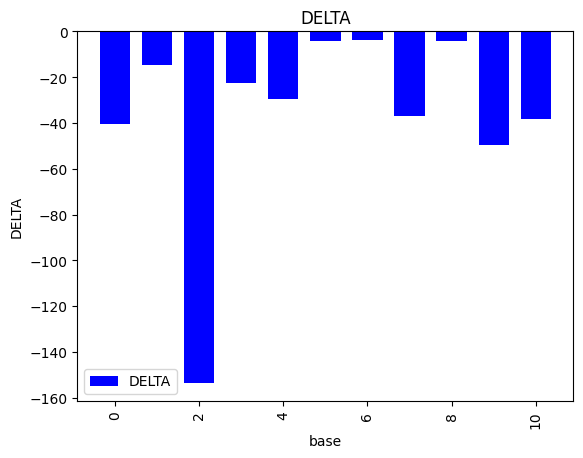

In [14]:
import matplotlib.pyplot as plt
import csv

import numpy as np
  
x = []
y = []
labels = ['FPR@95','AUROC','AUPR_IN','AUPR_OUT','CCR_4','CCR_3','CCR_2','CCR_1','ACC','ERROR','DELTA']
i = 10
with open('../features/ood.csv','r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        x.append(row[0])
        y.append([float(z) for z in row[1:]])

y = np.array(y)
means = []
for n in range(11):
    filtered_data = y[np.arange(y.shape[0]) % 11 == n, i] # i od :
    means.append(np.mean(filtered_data))

# mask = (np.arange(y.shape[0]) % 11 == 10)
# x_ = [x for x, m in zip(x, mask) if m]
# y_ = [x for x, m in zip(y[:,i], mask) if m]
# plt.bar(x_, y_, color = 'b', width = 0.72, label = labels[i])
x_ = np.arange(11)  # Values on the X-axis
plt.bar(x_, means, color = 'b', width = 0.72, label = labels[i])
plt.xticks(rotation = 90) 
plt.xlabel('base')
plt.ylabel(labels[i])
plt.title(labels[i])
plt.legend()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import csv

# import numpy as np
  
# x = []
# y = []
# labels = ['FPR@95','AUROC','AUPR_IN','AUPR_OUT','CCR_4','CCR_3','CCR_2','CCR_1','ACC','ERROR','DELTA']
# methods = ['MSP', 'MLS', 'ReAct', 'KNN', 'LOF', 'MDS', 'MDS 2', 'ODIN', 'ODIN 2']
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g']
# # i = 0
# with open('../features/ood__.csv','r') as csvfile:
#     next(csvfile)
#     plots = csv.reader(csvfile, delimiter = ',')
      
#     for row in plots:
#         x.append(row[0])
#         y.append([float(z) for z in row[1:-1]])

# y = np.array(y)
# plots = 1
# fig, ax = plt.subplots(plots)
# if plots == 1:
#     ax = [ax]
# fig.set_figheight(10)
# fig.set_figwidth(10)
# y_ = []
# offset = 4
# x_axis = np.arange(11)
# for j in range(offset, plots + offset):
#     mask = (np.arange(y.shape[0]) <99)
#     # mask = (np.arange(y.shape[0]) % 11 == 8)
#     x_ = [x for x, m in zip(x, mask) if m]
#     x_ = np.array([x_[i:i+11] for i in range(0, len(x_), 11)])
#     # y_.append([x for x, m in zip(y[:,j], mask) if m])
#     mask = (np.arange(y.shape[0]) <99)
#     y__ = [x for x, m in zip(y[:,j], mask) if m]
#     y__ = np.array([y__[i:i+11] for i in range(0, len(y__), 11)])
#     # print(len(x_[0]), len(y__[0]))
#     # print(x_[0], y__[j])
#     for k in range(9):
#         # ax[j - offset].bar(x_axis+0.05*(k+1), y__[k], color = colors[k], width = 0.05, label = methods[k])
#         print(y__[k])
#         ax[j - offset].barh(x_axis+0.1*k, left=y__[k], color = colors[k], width = .1, height=0.1, label = methods[k])
#     # ax[j - offset].tick_params(axis='x', labelrotation=90)
#     # ax[j - offset].xticks(rotation = 90) 
#     # ax[j - offset].set_xlabel('dataset')
#     ax[j - offset].set_yticks(x_axis,x_[0])
#     # if j == 0:
#     #     ax[j - offset].set_ylim([25, 60]) 
#     # else:
#     #     ax[j - offset].set_ylim([80, 100])         
#     # ax[j - offset].set_ylabel(labels[j])
#     ax[j - offset].set_title(labels[j])
#     ax[j - offset].legend()
# # plt.show()